Student Name: Adnan Ali,  Student ID: 20020536

In [154]:
import numpy as np
import pandas as pd
import wbgapi as wb
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import scipy.optimize as opt
import itertools as iter

import warnings
warnings.filterwarnings("ignore")

In [155]:
country_codes = ["GBR","AUS","USA","DEU","FRA","JPN","KOR","CAN","CHE","TUR","ESP","ITA"]

country_names = {
    "GBR" : "United Kingdom",
    "AUS" : "Australia",
    "USA" : "United States",
    "DEU" : "Germany",
    "FRA" : "France",
    "JPN" : "Japan",
    "KOR" : "South Korea",
    "CAN" : "Canada",
    "CHE" : "Switzerland",
    "TUR" : "Turkey",
    "ESP" : "Spain",
    "ITA" : "Italy"
}

#Agricultural land (% of land area)
#Crop production 
#Food production 
indicators=['AG.LND.AGRI.ZS','AG.PRD.CROP.XD','AG.PRD.FOOD.XD']

In [156]:
# This function retrieves data from world bank website and saves it into a file
def bank_data(data):
    print(wb.series.info(indicators))
    
    years = np.array(range(1970,2019))

    #MultiIndex Columns
    columns=pd.MultiIndex.from_arrays([['Agricultural_land','Crop_production',
                                          'Food_production'],
                                            ['','','']])
    #MultiIndex Rows
    eco_index = pd.MultiIndex.from_product([data, years],
                                       names=['Country', 'Year'])

    df_production = pd.DataFrame()

    for all_data in data:
        df_cli = wb.data.DataFrame(indicators, all_data, time=range(1970,2019)).set_index(columns)
        #use concat hierarchical indexing
        df_production = pd.concat([df_production, df_cli.T], ignore_index=True)

    df_production = df_production.set_index(eco_index)

    # Checking for null values in dataframe
    display("Checking null values in DataFrame")
    display(df_production.isnull().sum())
    
    return df_production

In [157]:
final_df = bank_data(country_codes)
final_df

id              value
--------------  ---------------------------------------
AG.LND.AGRI.ZS  Agricultural land (% of land area)
AG.PRD.CROP.XD  Crop production index (2014-2016 = 100)
AG.PRD.FOOD.XD  Food production index (2014-2016 = 100)
                3 elements


'Checking null values in DataFrame'

Agricultural_land      0
Crop_production        0
Food_production        0
dtype: int64

Agricultural_land Crop_production Food_production
                                                              
Country Year                                                  
GBR     1970         77.910966       70.529999       77.970001
        1971         77.886165       73.989998       79.190002
        1972         77.526557       71.080002       80.269997
        1973         77.278552       73.870003       81.239998
        1974         77.038813       76.220001       84.769997
...                        ...             ...             ...
ITA     2014         44.747399       95.400002       95.580002
        2015         44.009655      103.059998      102.550003
        2016         43.557490      101.540001      101.879997
        2017         43.607024       96.940002       98.070000
        2018         41.665267       95.150002       98.910004

[588 rows x 3 columns]

In [158]:
final_df.groupby('Country').describe().T

Country                          AUS         CAN         CHE         DEU  \
Agricultural_land  count   49.000000   49.000000   49.000000   49.000000   
                   mean    58.259455    6.793882   40.238786   50.523189   
                   std      6.316012    0.185615    1.261064    2.341447   
                   min     44.539926    6.435684   38.214254   47.641536   
                   25%     51.853677    6.757391   39.142647   48.594861   
                   50%     60.383088    6.833125   40.142680   49.640453   
                   75%     63.883472    6.893133   41.524995   52.690975   
                   max     65.181261    7.044824   42.347197   54.486867   
Crop_production    count   49.000000   49.000000   49.000000   49.000000   
                   mean    67.154286   62.104082  113.120000   90.664285   
                   std     23.693385   21.087347   13.459657    7.381608   
                   min     31.360001   30.680000   92.169998   74.239998   
                   25%     49.119999   46.400002  103.059998   84.610001   
                   50%     59.869999   58.900002  111.300003   91.489998   
                   75%     88.239998   72.870003  122.400002   95.510002   
                   max    121.239998  108.019997  152.089996  107.610001   
Food_production    count   49.000000   49.000000   49.000000   49.000000   
                   mean    71.736123   69.242858   98.539388   93.981837   
                   std     17.264626   18.288463    5.127825    5.670311   
                   min     45.020000   41.340000   85.269997   83.339996   
                   25%     58.060001   55.779999   95.339996   89.309998   
                   50%     68.480003   65.889999   98.529999   94.139999   
                   75%     86.620003   82.000000  101.830002   97.500000   
                   max    104.040001  108.370003  108.660004  106.830002   

Country                          ESP         FRA         GBR         ITA  \
Agricultural_land  count   49.000000   49.000000   49.000000   49.000000   
                   mean    59.564984   55.600661   73.663169   53.784573   
                   std      3.683630    2.372541    2.515241    5.862939   
                   min     52.408210   52.341765   70.073988   41.665267   
                   25%     57.342980   53.533605   71.302443   49.150745   
                   50%     60.345587   55.162117   73.095523   53.717997   
                   75%     62.449445   57.793946   75.724383   59.440345   
                   max     65.396775   59.578206   77.910966   68.613784   
Crop_production    count   49.000000   49.000000   49.000000   49.000000   
                   mean    81.226122   92.835918   90.264082  110.866327   
                   std     16.670734    8.510116   11.100585    7.620881   
                   min     50.980000   72.019997   59.730000   95.150002   
                   25%     68.720001   89.279999   85.750000  107.889999   
                   50%     81.290001   94.150002   93.199997  111.510002   
                   75%     94.529999   99.510002   98.139999  114.589996   
                   max    121.690002  105.989998  105.180000  129.990005   
Food_production    count   49.000000   49.000000   49.000000   49.000000   
                   mean    78.605510   97.674898   93.311633  108.979795   
                   std     17.397420    6.506800    6.533480    6.592004   
                   min     46.520000   82.750000   77.970001   93.440002   
                   25%     64.449997   95.849998   90.750000  103.900002   
                   50%     76.720001   99.239998   95.199997  110.559998   
                   75%     93.459999  102.029999   97.940002  113.239998   
                   max    117.860001  107.599998  102.199997  123.419998   

Country                          JPN         KOR         TUR         USA  
Agricultural_land  count   49.000000   49.000000   49.000000   49.000000  
                   mean    14.859051   21.131221

In [159]:
def norm(array):
    min_val = np.min(array)
    max_val = np.max(array)
    
    scaled = (array-min_val) / (max_val-min_val)
    
    return scaled

def norm_df(df):
    # iterate over all columns
    for col in df.columns[1:]:     # excluding the first column
        df[col] = norm(df[col])
        
    return df

In [160]:
# normalise result and inspect results
normalised_df = norm_df(final_df)
print(normalised_df.describe())
print()

      Agricultural_land Crop_production Food_production
                                                       
count        588.000000      588.000000      588.000000
mean          44.253281        0.482929        0.575915
std           19.453966        0.198634        0.220691
min            6.435684        0.000000        0.000000
25%           34.683912        0.350404        0.411393
50%           49.325650        0.517750        0.650675
75%           57.848934        0.606004        0.734774
max           77.910966        1.000000        1.000000



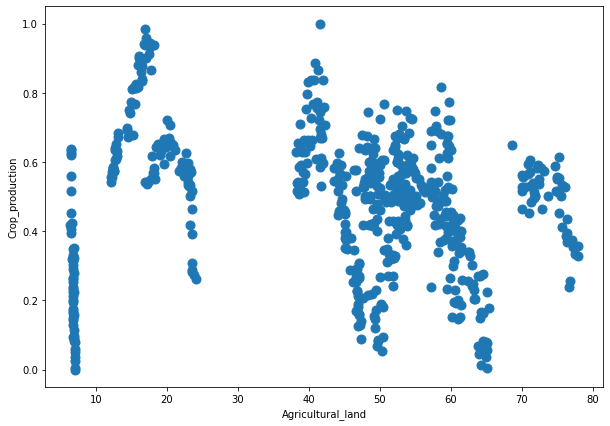

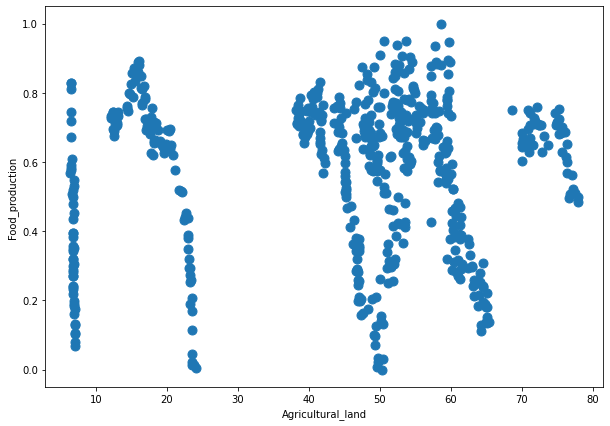

In [193]:
def makeplot(df, col1, col2):
    plt.figure(figsize=(10.0,7.0))
    plt.plot(df[col1], df[col2], "o", markersize=9)
    
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.savefig(f'{col1}_dataplot.jpg')

    plt.show()
    
makeplot(normalised_df, "Agricultural_land", "Crop_production")
makeplot(normalised_df, "Agricultural_land", "Food_production")

## K Mean Clustering

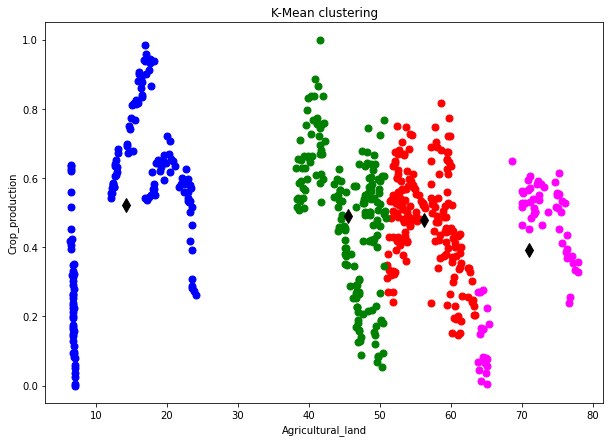

In [162]:
####### kmeans set up the clusterer, 4 expected clusters
kmeans = cluster.KMeans(n_clusters=4)

# extract columns for fitting
df_fit = normalised_df[["Agricultural_land", "Crop_production"]].copy()
kmeans.fit(df_fit)     

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(10.0,7.0))

col = ["blue", "red", "green", "magenta"]
for l in range(4):     # loop over the different labels
    plt.plot(df_fit["Agricultural_land"][labels==l], df_fit["Crop_production"][labels==l], "o",
             markersize=7, color=col[l])

# show cluster centres
for ic in range(4):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)

plt.xlabel("Agricultural_land")
plt.ylabel("Crop_production")
plt.title('K-Mean clustering')
plt.savefig('K-Mean cluster.jpg')
plt.show()

# Agglomerative Clustering

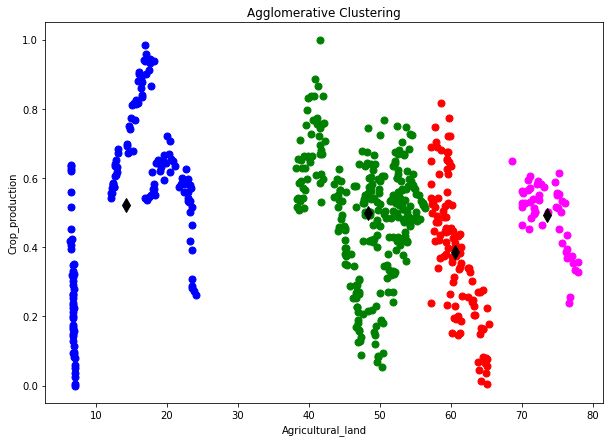

In [163]:
##### setting up agglomerative clustering for 4 clusters
ac = cluster.AgglomerativeClustering(n_clusters=4)

df_fit = normalised_df[["Agricultural_land", "Crop_production"]].copy()

# carry out the fitting
ac.fit(df_fit)

labels = ac.labels_

# The clusterer does not return cluster centres, but they are easily computed
xcen = []
ycen = []
for ic in range(4):
    xc = np.average(df_fit["Agricultural_land"][labels==ic])
    yc = np.average(df_fit["Crop_production"][labels==ic])
    xcen.append(xc)
    ycen.append(yc)

# plot using the labels to select colour
plt.figure(figsize=(10.0,7.0))

col = ["blue", "red", "green", "magenta"]
for l in range(0,4):     # loop over the different labels
    plt.plot(df_fit["Agricultural_land"][labels==l], df_fit["Crop_production"][labels==l], "o", 
             markersize=7, color=col[l])

# show cluster centres
for ic in range(4):
    plt.plot(xcen[ic], ycen[ic], "dk", markersize=10)

plt.xlabel("Agricultural_land")
plt.ylabel("Crop_production")
plt.title('Agglomerative Clustering')
plt.savefig('agglomerative cluster.jpg')
plt.show()

## Data Fitting

In [164]:
def exp_growth(t, scale, growth):
    f = scale * np.exp(growth * (t-1990)) 
    return f
        

def logistics(t, scale, growth, t0):
    f = scale / (1.0 + np.exp(-growth * (t - t0)))
    return f
# Define the exponential function and the logistics functions for fitting.

In [165]:
# taking one country from climate set
country_df = bank_data(['AUS'])
country_df

id              value
--------------  ---------------------------------------
AG.LND.AGRI.ZS  Agricultural land (% of land area)
AG.PRD.CROP.XD  Crop production index (2014-2016 = 100)
AG.PRD.FOOD.XD  Food production index (2014-2016 = 100)
                3 elements


'Checking null values in DataFrame'

Agricultural_land      0
Crop_production        0
Food_production        0
dtype: int64

Agricultural_land Crop_production Food_production
                                                              
Country Year                                                  
AUS     1970         64.229788       32.430000       45.020000
        1971         65.024298       35.200001       47.450001
        1972         65.060594       31.360001       48.590000
        1973         64.810929       38.509998       51.900002
        1974         65.131146       37.419998       47.040001
        1975         65.025708       40.529999       51.279999
        1976         65.181261       39.980000       54.880001
        1977         63.979537       36.320000       54.270000
        1978         64.577015       50.500000       62.419998
        1979         64.204470       48.619999       59.830002
        1980         64.516876       40.750000       52.590000
        1981         64.507374       50.650002       56.180000
        1982         63.883472       38.790001       51.369999
        1983         62.974500       60.080002       61.290001
        1984         63.334939       58.790001       58.060001
        1985         63.365268       55.450001       57.150002
        1986         60.989678       55.270000       59.099998
        1987         61.312367       49.200001       58.430000
        1988         61.446702       53.459999       60.970001
        1989         60.802624       54.110001       60.020000
        1990         60.455463       54.360001       62.720001
        1991         60.240032       49.119999       60.630001
        1992         60.659438       58.709999       65.760002
        1993         59.890528       62.919998       68.480003
        1994         61.068040       48.279999       63.110001
        1995         60.318915       66.940002       70.910004
        1996         60.558687       80.680000       76.370003
        1997         60.168569       75.779999       75.650002
        1998         60.383088       82.419998       81.199997
        1999         59.056923       89.760002       85.820000
        2000         59.288104       84.760002       84.900002
        2001         59.318173       86.040001       86.620003
        2002         58.185700       88.239998       88.169998
        2003         57.209429       59.740002       72.970001
        2004         51.404657       95.300003       89.389999
        2005         53.399373       88.370003       86.709999
        2006         53.278575       92.639999       90.370003
        2007         51.853677       59.869999       75.949997
        2008         50.673366       72.800003       80.370003
        2009         50.018484       86.779999       86.199997
        2010         48.992099       86.940002       85.809998
        2011         51.562813       95.650002       89.769997
        2012         50.385431      104.099998       94.900002
        2013         48.393710       98.379997       96.230003
        2014         48.738399       99.040001      100.029999
        2015         45.314424       98.620003      100.620003
        2016         44.539926      102.330002       99.349998
        2017         48.340618      121.239998      104.040001
        2018         46.658095       93.330002       94.180000

In [166]:
ctr=[]
yr=[]
for idx in country_df.index:
    ctr.append(idx[0])
    yr.append(idx[1])
country_df.insert(0,"Country",ctr)
country_df.insert(1,"Year",yr)
country_df=country_df.reset_index(drop=True)
country_df=country_df.fillna(country_df.mean())
country_df["Year"] = country_df["Year"].astype(int)  

In [167]:
# fit exponential growth
popt, covar = opt.curve_fit(exp_growth, country_df['Year'], country_df['Crop_production'])

Fit parameter [5.84383728e+01 2.25371029e-02]


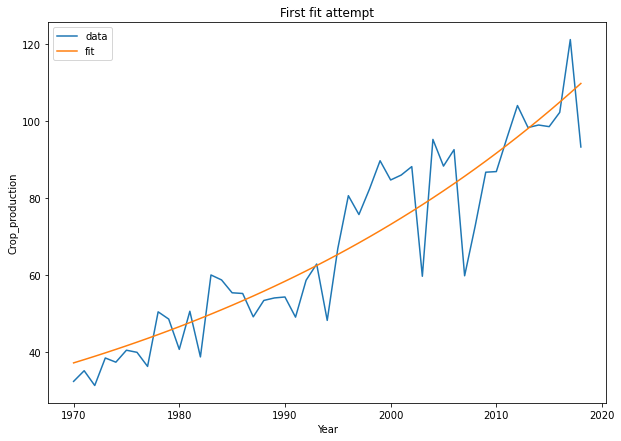

In [168]:
print("Fit parameter", popt)

# use *popt to pass on the fit parameters
country_df["crop_exp"] = exp_growth(country_df["Year"], *popt)

plt.figure(figsize=(10.0,7.0))
plt.plot(country_df["Year"], country_df["Crop_production"], label="data")
plt.plot(country_df["Year"], country_df["crop_exp"], label="fit")

plt.legend()
plt.title("First fit attempt")
plt.xlabel("Year")
plt.ylabel("Crop_production")
plt.savefig('exp_first attempt.jpg')
plt.show()
print()

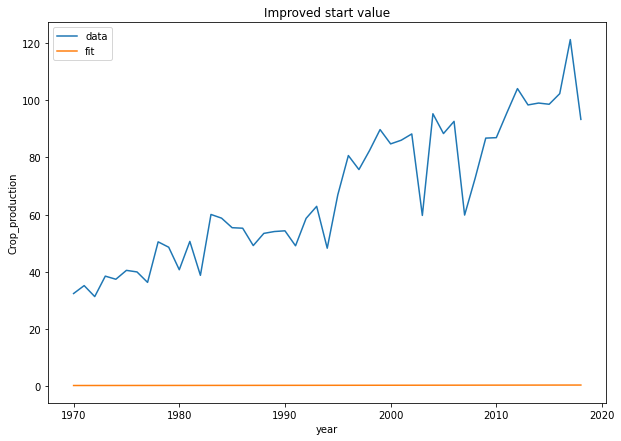

In [169]:
# decrease or increase exponential factor until rough agreement is reached
# growth of 0.02 gives a reasonable start value
popt = [0.32, 0.01]
country_df["crop_exp"] = exp_growth(country_df["Year"], *popt)

plt.figure(figsize=(10.0,7.0))
plt.plot(country_df["Year"], country_df["Crop_production"], label="data")
plt.plot(country_df["Year"], country_df["crop_exp"], label="fit")

plt.legend()
plt.xlabel("year")
plt.ylabel("Crop_production")
plt.title("Improved start value")
plt.savefig('exp_Improved start.jpg')
plt.show()

Fit parameter [5.84383657e+01 2.25371127e-02]


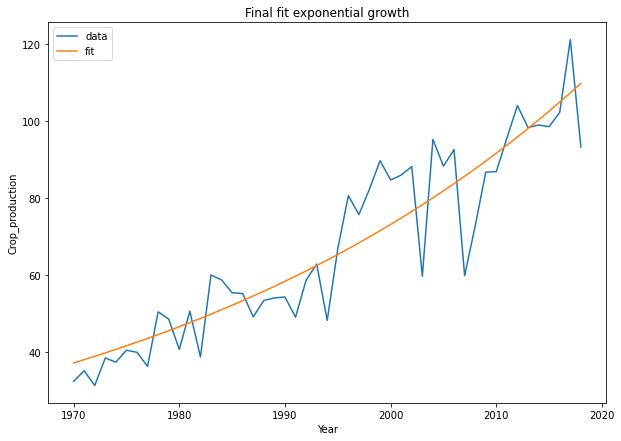

In [170]:
# fit exponential growth
popt, covar = opt.curve_fit(exp_growth, country_df["Year"], 
                            country_df["Crop_production"], p0=[0.32, 0.02])
# much better
print("Fit parameter", popt)

country_df["crop_exp"] = exp_growth(country_df["Year"], *popt)

plt.figure(figsize=(10.0,7.0))
plt.plot(country_df["Year"], country_df["Crop_production"], label="data")
plt.plot(country_df["Year"], country_df["crop_exp"], label="fit")

plt.legend()
plt.xlabel("Year")
plt.ylabel("Crop_production")
plt.title("Final fit exponential growth")
plt.savefig('exp_final fit.jpg')
plt.show()
print()

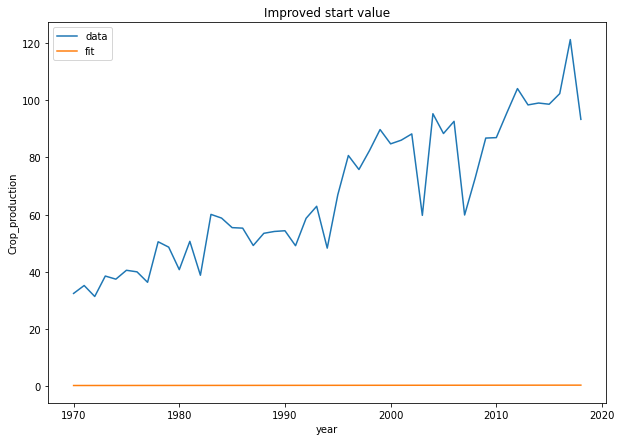

In [171]:
# kept growth value from before
# increase scale factor and growth rate until rough fit
popt = [0.54, 0.02, 1990]
country_df["crop_log"] = logistics(country_df["Year"], *popt)

plt.figure(figsize=(10.0,7.0))
plt.plot(country_df["Year"], country_df["Crop_production"], label="data")
plt.plot(country_df["Year"], country_df["crop_log"], label="fit")

plt.legend()
plt.xlabel("year")
plt.ylabel("Crop_production")
plt.title("Improved start value")
plt.savefig('log_improved start.jpg')
plt.show()

Fit parameter [1.63126671e+02 4.05412503e-02 2.00351105e+03]


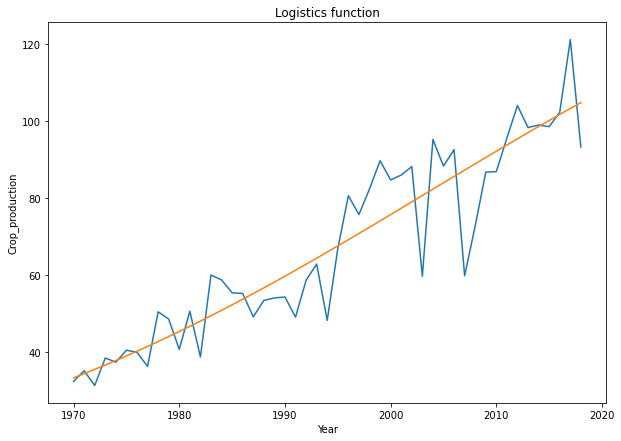

In [187]:
popt, covar = opt.curve_fit(logistics, country_df["Year"], country_df["Crop_production"], 
                            p0=(2e9, 0.05, 1990.0), maxfev=1200)
print("Fit parameter", popt)

      
country_df["crop_log"] = logistics(country_df["Year"], *popt)

plt.figure(figsize=(10.0,7.0))
plt.title("Logistics function")
plt.plot(country_df["Year"], country_df["Crop_production"], label="data")
plt.plot(country_df["Year"], country_df["crop_log"], label="fit")

plt.xlabel("Year")
plt.ylabel("Crop_production")
plt.savefig('log_function.jpg')
plt.show()

In [188]:
import itertools as iter

def err_ranges(x, func, param, sigma):
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
    
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)

        
    return lower, upper

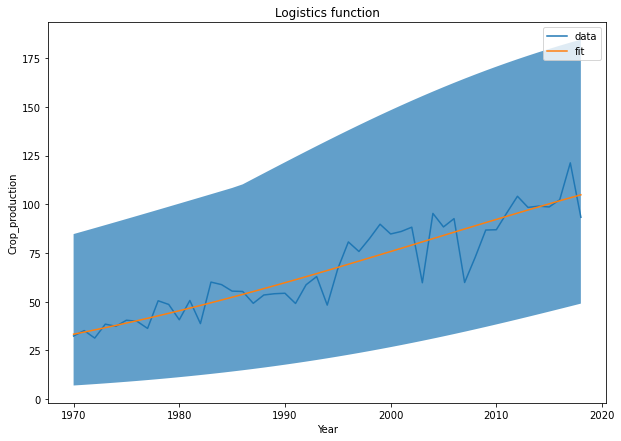

In [189]:
# extract the sigmas from the diagonal of the covariance matrix
sigma = np.sqrt(np.diag(covar))

low, up = err_ranges(country_df["Year"], logistics, popt, sigma)

plt.figure(figsize=(10.0,7.0))
plt.title("Logistics function")
plt.plot(country_df["Year"], country_df["Crop_production"], label="data")
plt.plot(country_df["Year"], country_df["crop_log"], label="fit")

plt.fill_between(country_df["Year"], low, up, alpha=0.7)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Crop_production")
plt.savefig('error range.jpg')
plt.show()

In [190]:
print("Forcasted Crop_production")
low, up = err_ranges(2030, logistics, popt, sigma)
print("2030 between ", low, "and", up)
low, up = err_ranges(2040, logistics, popt, sigma)
print("2040 between ", low, "and", up)
low, up = err_ranges(2050, logistics, popt, sigma)
print("2050 between ", low, "and", up)

Forcasted Crop_production
2030 between  60.32698741111771 and 199.0963742721422
2040 between  67.83917716206273 and 206.7891088801082
2050 between  74.78712972215187 and 211.66156007700653


In [191]:
print("Forcasted Crop_production")
low, up = err_ranges(2030, logistics, popt, sigma)
mean = (up+low) / 2.0
pm = (up-low) / 2.0
print("2030:", mean, "+/-", pm)

low, up = err_ranges(2040, logistics, popt, sigma)
mean = (up+low) / 2.0
pm = (up-low) / 2.0
print("2040:", mean, "+/-", pm)

low, up = err_ranges(2050, logistics, popt, sigma)
mean = (up+low) / 2.0
pm = (up-low) / 2.0
print("2050:", mean, "+/-", pm)

Forcasted Crop_production
2030: 129.71168084162997 +/- 69.38469343051224
2040: 137.31414302108544 +/- 69.47496585902273
2050: 143.2243448995792 +/- 68.43721517742733
